In [1]:
# https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

'Trains a simple convnet on the MNIST dataset.\nGets to 99.25% test accuracy after 12 epochs\n(there is still a lot of margin for parameter tuning).\n16 seconds per epoch on a GRID K520 GPU.\n'

# Imports

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


# Settings

In [11]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# Data loading

In [12]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing (preprocessing etc.)

In [13]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Setting up neural network architecture

In [19]:
# simple

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
# # simplest xd
# model = Sequential()
# model.add(Flatten(input_shape=input_shape))
# model.add(Dense(num_classes, activation='softmax'))

# Compiling model (with defined loss function)

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Training model

In [21]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 6912/60000 [==>...........................] - ETA: 73s - loss: 1.0697 - acc: 0.6544

KeyboardInterrupt: 

In [22]:
# model.save_weights('../models/mnist_simple.weights')
model.load_weights('../models/mnist_simple.weights')

# Evaluating model

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0284403519548
Test accuracy: 0.9909


# Model inference

In [27]:
model.predict(x_train[0:3]).shape

(3, 10)

In [28]:
import numpy as np

In [35]:
a = np.random.random(size=(5,40))
b = np.random.random(size=(40, 2))
a.dot(b).shape

(5, 2)

(20, 2)

In [5]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [6]:
x_train[0].shape

(28, 28)

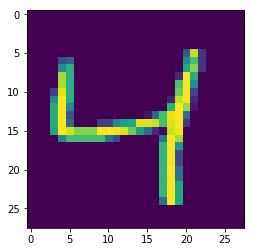

In [10]:
plt.imshow(x_train[2, :, :])